In [5]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
from ppo import PPO

# === MLP Actor-Critic ===
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, activation=F.relu):
        super().__init__()
        self.fc1 = nn.Linear(state_dim, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, action_dim)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return Categorical(logits=x)

class Critic(nn.Module):
    def __init__(self, state_dim, activation=F.relu):
        super().__init__()
        self.fc1 = nn.Linear(state_dim, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 1)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)

# === Env ===
# Use LunarLander-v2 (discrete action space: 4 actions)
env = gym.make("LunarLander-v2")
obs_dim = env.observation_space.shape[0]  # 8 for LunarLander
act_dim = env.action_space.n  # 4 for LunarLander (0: do nothing, 1: left, 2: main, 3: right)

print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
print(f"Obs dim: {obs_dim}, Act dim: {act_dim}")

# === PPO Agent ===
actor = Actor(state_dim=obs_dim, action_dim=act_dim)
critic = Critic(state_dim=obs_dim)
agent = PPO(env, actor, critic, discrete=True, suffix='_lunarlander')

# Train the agent
agent.train(n_iters=1000, max_timesteps_per_iter=512)

Observation space: Box([-90.        -90.         -5.         -5.         -3.1415927  -5.
  -0.         -0.       ], [90.        90.         5.         5.         3.1415927  5.
  1.         1.       ], (8,), float32)
Action space: Discrete(4)
Obs dim: 8, Act dim: 4
Iter 1/1000 | Eps: 22 | Steps: 2048 | Mean: -242.69 | Rolling(22): -242.69±122.69
  ✓ New best rolling avg: -242.69
  Early stop at epoch 3 (KL: 0.0169)
Iter 2/1000 | Eps: 23 | Steps: 2048 | Mean: -171.40 | Rolling(45): -206.25±115.17
  ✓ New best rolling avg: -206.25
  Early stop at epoch 6 (KL: 0.0165)
Iter 3/1000 | Eps: 24 | Steps: 2048 | Mean: -167.69 | Rolling(69): -192.84±108.72
  ✓ New best rolling avg: -192.84
  Early stop at epoch 4 (KL: 0.0219)
Iter 4/1000 | Eps: 22 | Steps: 2048 | Mean: -118.67 | Rolling(91): -174.91±102.79
  ✓ New best rolling avg: -174.91
  Early stop at epoch 3 (KL: 0.0200)
Iter 5/1000 | Eps: 21 | Steps: 2048 | Mean: -126.00 | Rolling(100): -158.72±93.56
  ✓ New best rolling avg: -158.72
  Early

In [9]:
agent.evaluate(render=True, n_episodes=10)

(61.810395495382735,
 [-32.774382804868,
  -62.50528284072007,
  78.54700514248735,
  26.225154252098868,
  85.9652894992023,
  106.02886030840303,
  84.20865978466327,
  -85.65708746051753,
  218.20075909167423,
  122.16894434624037,
  144.78340516492648,
  66.23892129662472,
  196.48215696720038,
  -75.32628873438064,
  108.4868265992138,
  121.44719860746127,
  74.82989880905552,
  130.53636657003486,
  128.71488976840973,
  103.41704594333763,
  149.71331320666906,
  -81.91898134777198,
  170.71432525246746,
  38.73555176019927,
  -37.83784428144719,
  188.10218276102216,
  -73.72907116615924,
  216.18561587653824,
  -61.373331959914495,
  120.3903894411142,
  -79.80265270272767,
  30.232452047859148,
  58.42501516432266,
  189.40741556829346,
  158.23624658648424,
  -98.6958276467304,
  111.11591481785,
  109.81442225485888,
  98.75228864442202,
  106.88046514750256,
  47.93955831129219,
  139.78679334891956,
  141.31205259654115,
  142.34018781168263,
  -38.96294919635561,
  -164

Plot saved to 'training_results.png'


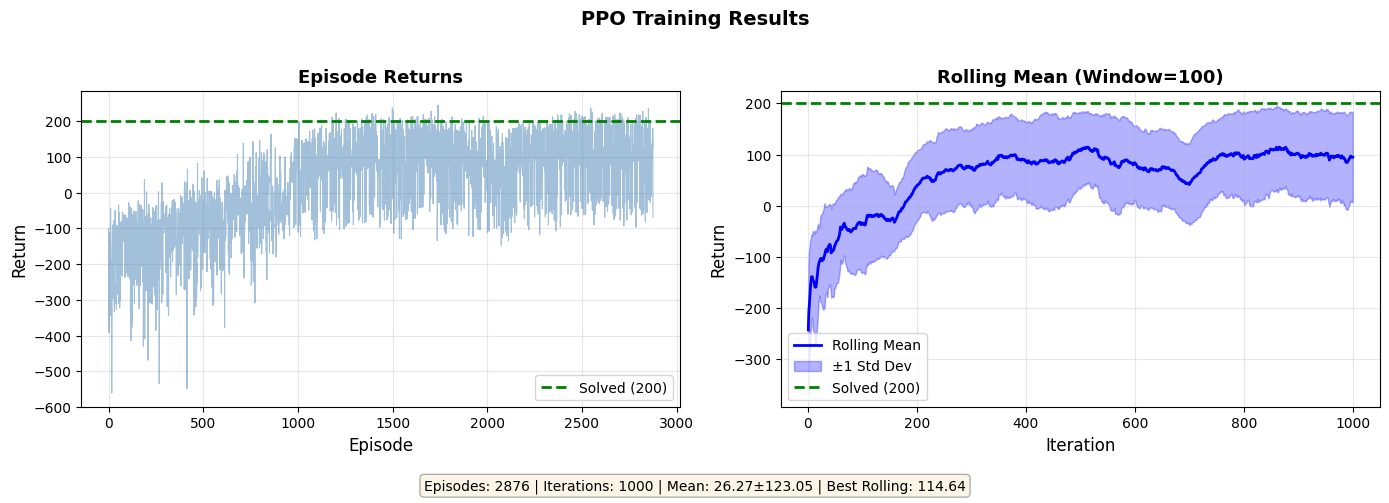